Levy metric as time series distance.

This notebook tries to 

1. show naive implementation Levy metric

1. show **Levy metric is sensitive to shift difference**, compared to other famous metrics (KL, W-distance)
 -> suggests Levy metric be useful in training time forcasting model

# 1. Implementation of Levy metric

## Definition

  $$Levy(F, G) = \inf_\epsilon  [\epsilon > 0 | \forall x \in D, F(x-\epsilon) - \epsilon \leq G(x) \leq F(x+\epsilon) + \epsilon] $$
  where $x \in \mathbb{R}$, $D$ is the shared domain of the functions $F, G$.

In what follows we assume $D$ is _finite_.  More specifically, we assume $D$ is 1D _lattice_.

## Numerical implementation

In [53]:
def get_epsln_candidate(F, G, domain, epsln_candidate):
    epsln_list = []
    
    for epsln in epsln_candidate:
        cond = [(F(x - epsln) -epsln <= G(x)) and  (G(x) <= F(x + epsln) + epsln) for x in domain]
        if all(cond):
            epsln_list.append(epsln)
    
    return epsln_list

In [54]:
def Levy(F, G, domain, epsln_candidate):
    return get_epsln_candidate(F, G, domain, epsln_candidate)

# 2. Sensitivity to time shift (comparison to other metrics)

## test functions

In [4]:
import scipy
import scipy.special

In [5]:
F = lambda z: scipy.special.erf(z) + 1
shift = 3
G = lambda z: scipy.special.erf(z - shift) + 1

def GG(shift):
    return lambda z: F(z-shift)

In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy

In [8]:
domain = numpy.linspace(-7, 7, 100)

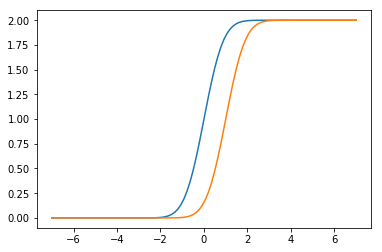

In [40]:
plt.plot(domain, F(domain))
plt.plot(domain, GG(1)(domain))
plt.show()

In [49]:
epsln_candidate = numpy.arange(0, 5, 0.001)

## Other metrics

### KL

In [27]:
import scipy.stats

In [28]:
f = scipy.stats.norm.pdf

def gg(shift):
    return lambda x: f(x - shift)

def KL(f, g, domain):
    return sum([scipy.special.kl_div(f(x), g(x)) for x in domain])

### Wasserstein (for temporal point process)

In [70]:
def W_dist(F, G, domain):
    domain = numpy.array(domain)
    return (abs(F(domain) - G(domain))).sum()
    

## Comparison

In [85]:
p_domain= domain[domain>=0] # positive domain

In [58]:
kls = []
lvs = []
for i in p_domain:
    kls.append(KL(f, gg(i), domain))
    lvs.append(min(Levy(F, GG(i), domain, epsln_candidate)))

In [78]:
wd = []
for i in p_domain:
    wd.append(W_dist(F, GG(i), domain))

### scaled comparison

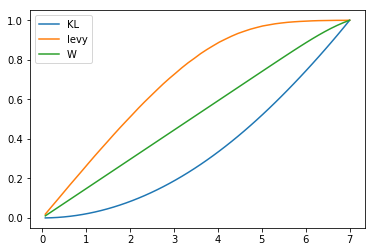

In [80]:
plt.xlabel='Shift'
plt.plot(p_domain, kls/max(kls), label='KL')
plt.plot(p_domain, lvs/max(lvs), label='levy')
plt.plot(p_domain, wd/max(wd), label='W')
plt.legend()

plt.show()

### without scaling

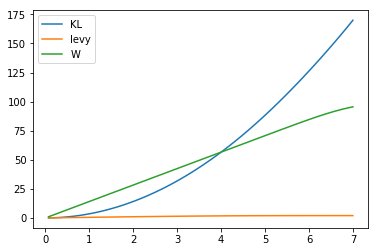

In [84]:
plt.xlabel='Shift'
plt.plot(p_domain, kls, label='KL')
plt.plot(p_domain, lvs, label='levy')
plt.plot(p_domain, wd, label='W')
plt.legend()

plt.show()